Ricardo Kaleb Flores Alfonso, A01198716

Primero se importan las librerias necesarias, se carga el set de datos y se hace una matriz de correlaciones a traves de df.corr(). Despues se hace un mapa de calor para visualizar las correlaciones.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Load the data from the Excel file
file_path = 'StressLevelDataset.csv'
# Load the dataset

df = pd.read_csv(file_path)

# Show the header and dataframe
print("Header:")
print(df.head())

# Scatter matrix
scatter_matrix = sns.pairplot(df, hue='stress_level', markers=["o", "s", "D"], palette="husl")
plt.suptitle("Scatter Matrix of Stress Level")
plt.show()

# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


Header:
   anxiety_level  self_esteem  mental_health_history  depression  headache  \
0             14           20                      0          11         2   
1             15            8                      1          15         5   
2             12           18                      1          14         2   
3             16           12                      1          15         4   
4             16           28                      0           7         2   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0               1              2                  4            2   
1               3              1                  4            3   
2               1              2                  2            2   
3               3              1                  3            4   
4               3              5                  1            3   

   living_conditions  ...  basic_needs  academic_performance  study_load  \
0                  3  ...            2

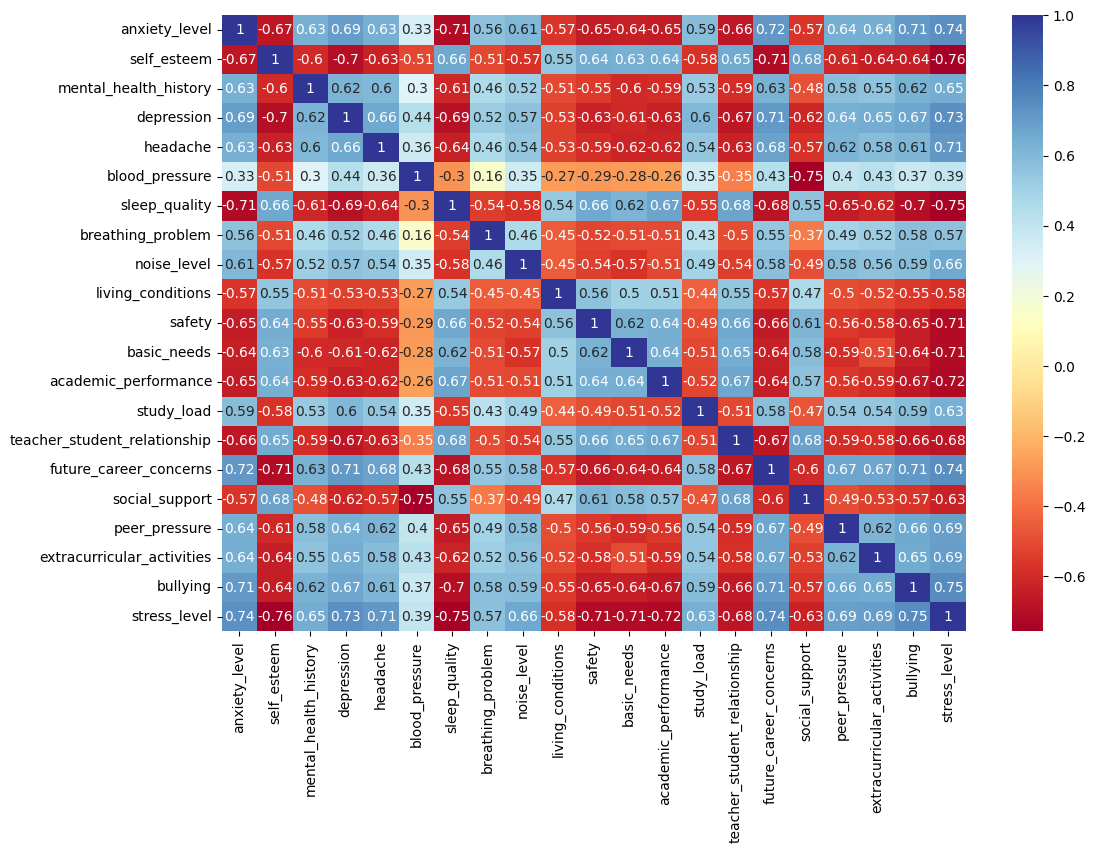

In [ ]:
# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlBu")
plt.show()

Dado que se encontraron correlaciones altas entre las variables, se usarán todas las variables para el modelo de regresión lineal. Estas variables se estandarizaran, de manera que puedan ser usadas por un modelo de regresión logistica. Este modelo se entrená y se usan los valores de predicciones para obtener una matríz de confusión que muestra que tan bien se ajusta el modelo a los datos.

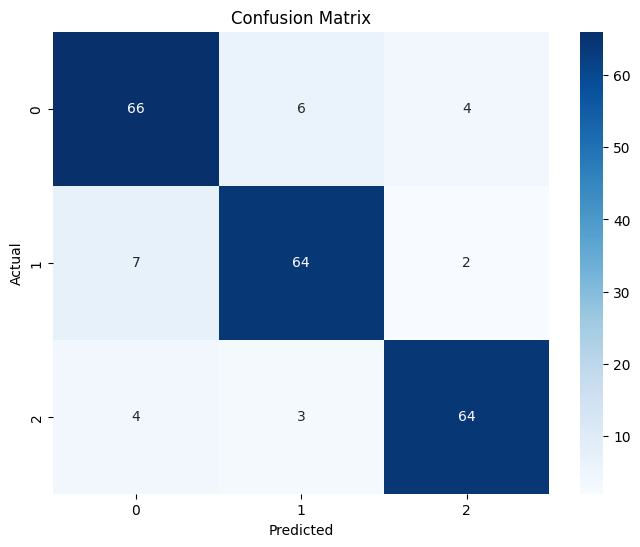

Confusion Matrix and Classification Report saved to Excel files.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'StressLevelDataset.csv'
df = pd.read_csv(file_path)

# Separate features (X) and target variable (y)
X = df.drop('stress_level', axis=1)
y = df['stress_level']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Logistic Regression model
logistic_regression_model = LogisticRegression(max_iter=1000)
logistic_regression_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logistic_regression_model.predict(X_test_scaled)

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Save the confusion matrix to Excel
confusion_matrix_df = pd.DataFrame(conf_matrix, index=['0', '1', '2'], columns=['0', '1', '2'])

# Save the classification report to an Excel file
classification_report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
classification_report_df.to_excel('/content/drive/MyDrive/Colab Notebooks/classification_report.xlsx')

# Display the results
print("Classification Report saved to Excel files.")


Esta matriz de confusión nos muestra las veces que tuvo razón al predecir un valor y las veces que no. Como se puede observar que al menos el 15% de las veces que dijo que era una clase, no lo era. Hay ventana para mejorar el modelo

Ahora se realizará el mismo proceso de dividir el set de datos en entrenamiento y prueba, pero esta vez se usará un SVM. Se entrenará el modelo y se obtendrá una matríz de confusión para ver que tan bien se ajusta el modelo a los datos.

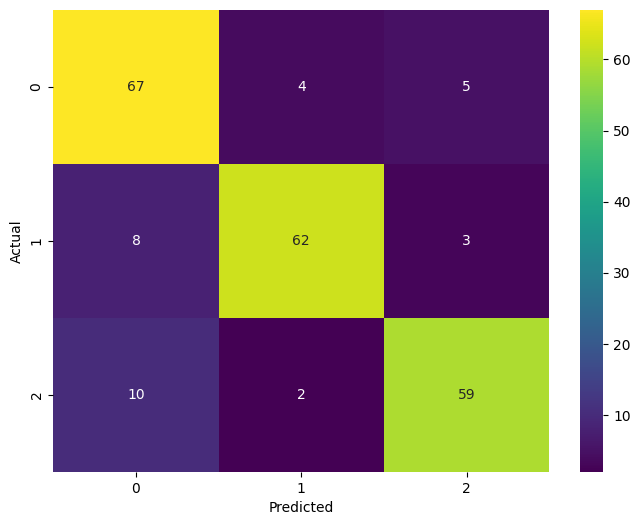

Classification Report saved to Excel files.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'StressLevelDataset.csv'
df = pd.read_csv(file_path)

# Separate features (X) and target variable (y)
X = df.drop('stress_level', axis=1)
y = df['stress_level']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SVM model
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="viridis", xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Save the confusion matrix to Excel
confusion_matrix_df = pd.DataFrame(conf_matrix, index=['0', '1', '2'], columns=['0', '1', '2'])
# Save the classification report to an Excel file
classification_report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
classification_report_df.to_excel('/content/drive/MyDrive/Colab Notebooks/classification_report_svm.xlsx')

# Display the results
print("Classification Report saved to Excel files.")


Con el SVM se obtine una mayor cantidad de aciertos cuando se predice que es clase 0, pero de igual manera aumentó las veces que se equivoca al decir que es clase 0 y no lo erá. 

Se hará otro modelo con el gradient boosting classfier para ver si se obtiene una mejor predicción.

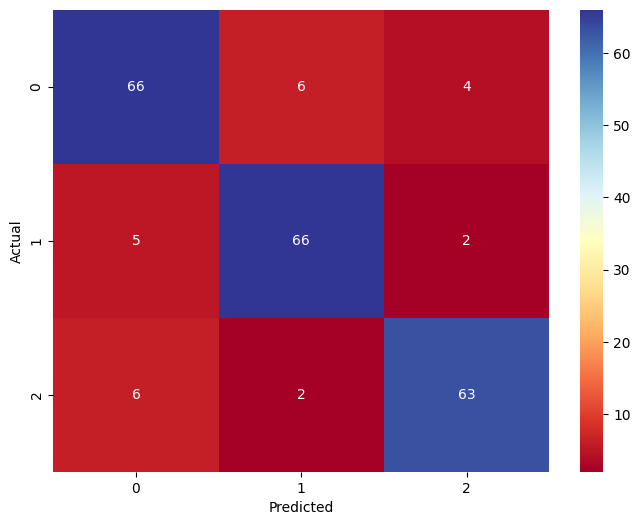

Classification Report saved to Excel files.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier  # Change this line
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'StressLevelDataset.csv'
df = pd.read_csv(file_path)

# Separate features (X) and target variable (y)
X = df.drop('stress_level', axis=1)
y = df['stress_level']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Gradient Boosting model
gb_model = GradientBoostingClassifier()  # Change this line
gb_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test_scaled)

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="RdYlBu", xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Save the confusion matrix to Excel
confusion_matrix_df = pd.DataFrame(conf_matrix, index=['0', '1', '2'], columns=['0', '1', '2'])
confusion_matrix_df.to_excel('/content/drive/MyDrive/Colab Notebooks/confusion_matrix_gb.xlsx')  # Change this line

# Save the classification report to an Excel file
classification_report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
classification_report_df.to_excel('/content/drive/MyDrive/Colab Notebooks/classification_report_gb.xlsx')  # Change this line

# Display the results
print("Classification Report saved to Excel files.")


En esta grafica podemos ver resultados similares al logistic regresor, donde los aciertos en las clases estan distribuidos equitativamente, y los errores tambien.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Load the dataset
file_path = 'StressLevelDataset.csv'
df = pd.read_csv(file_path)

# Separate features (X) and target variable (y)
X = df.drop('stress_level', axis=1)
y = df['stress_level']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data for CNN input (assuming X has a 2D shape)
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Create and train the CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

cnn_model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Make predictions on the test set
y_pred_proba = cnn_model.predict(X_test_reshaped)
y_pred = (y_pred_proba > 0.5).astype(int)

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="RdYlBu", xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Save the confusion matrix to Excel
confusion_matrix_df = pd.DataFrame(conf_matrix, index=['0', '1', '2'], columns=['0', '1', '2'])
confusion_matrix_df.to_excel('/content/drive/MyDrive/Colab Notebooks/confusion_matrix_cnn.xlsx')

# Save the classification report to an Excel file
classification_report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
classification_report_df.to_excel('/content/drive/MyDrive/Colab Notebooks/classification_report_cnn.xlsx')

# Display the results
print("Classification Report saved to Excel files.")


ModuleNotFoundError: No module named 'seaborn'

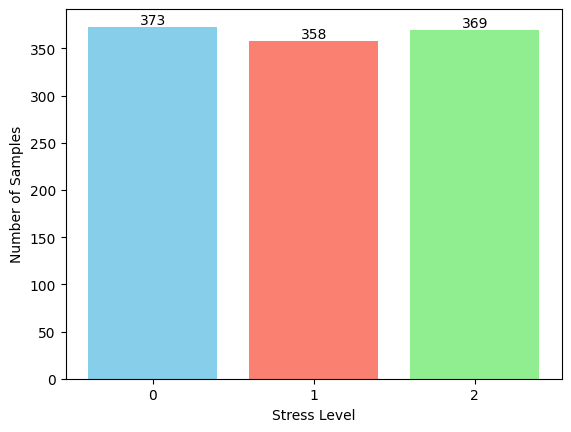

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/StressLevelDataset.csv'
df = pd.read_csv(file_path)

# Define attractive colors
colors = ['skyblue', 'salmon', 'lightgreen']

# Plot the distribution of stress_level classes
class_counts = df['stress_level'].value_counts().sort_index()
classes = class_counts.index
counts = class_counts.values

plt.bar(classes, counts, color=colors, label='Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Number of Samples')

# Add labels to each bar
for i, count in enumerate(counts):
    plt.text(classes[i], count + 0.1, str(count), ha='center', va='bottom', color='black')

# Set x-axis ticks to show only 0, 1, and 2
plt.xticks(classes)

plt.show()


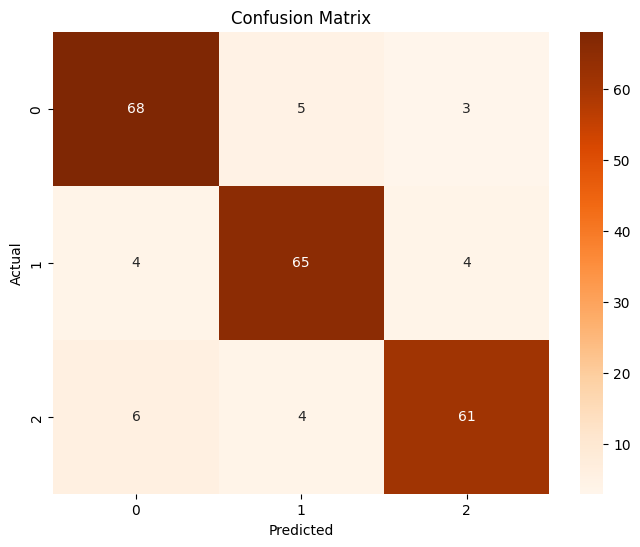

Classification Report saved to Excel files.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/StressLevelDataset.csv'
df = pd.read_csv(file_path)

# Separate features (X) and target variable (y)
X = df.drop('stress_level', axis=1)
y = df['stress_level']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test_scaled)

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Oranges", xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Save the confusion matrix to Excel
confusion_matrix_df = pd.DataFrame(conf_matrix, index=['0', '1', '2'], columns=['0', '1', '2'])
confusion_matrix_df.to_excel('/content/drive/MyDrive/Colab Notebooks/confusion_matrix_dt.xlsx')

# Save the classification report to an Excel file
classification_report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
classification_report_df.to_excel('/content/drive/MyDrive/Colab Notebooks/classification_report_dt.xlsx')

# Display the results
print("Classification Report saved to Excel files.")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 5.4 MB/s eta 0:00:00


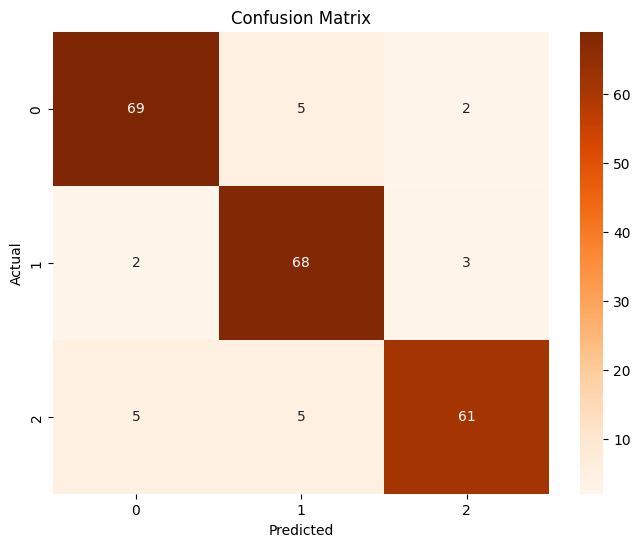

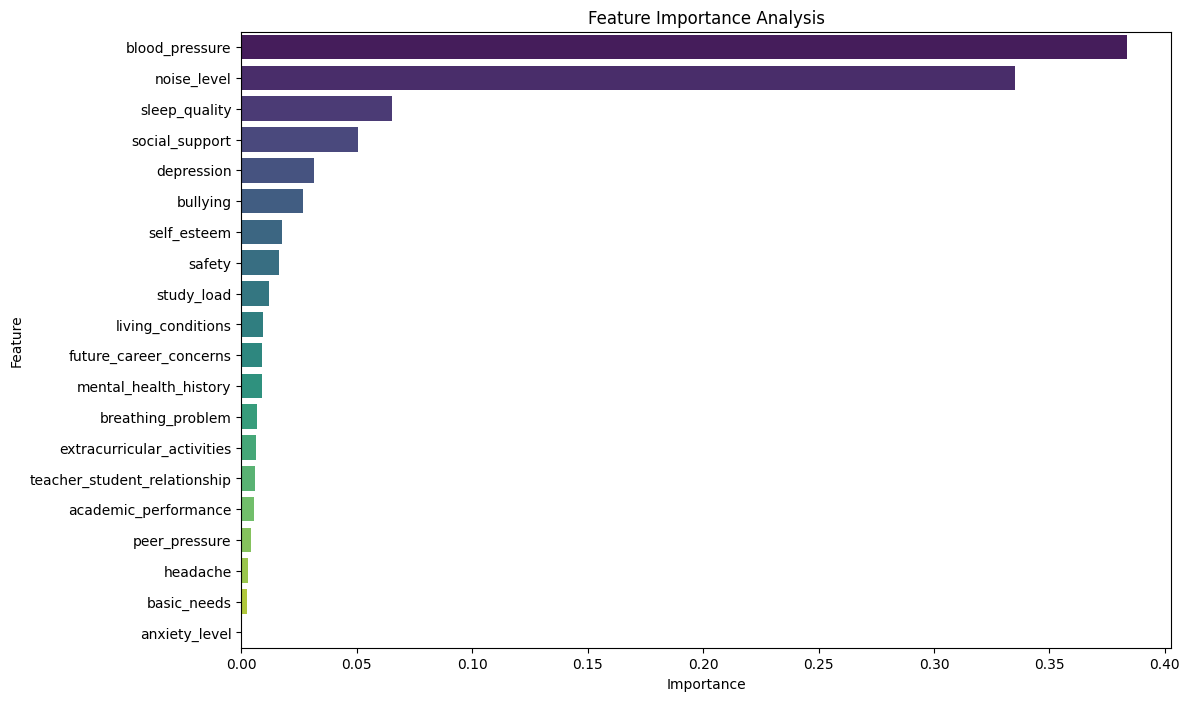

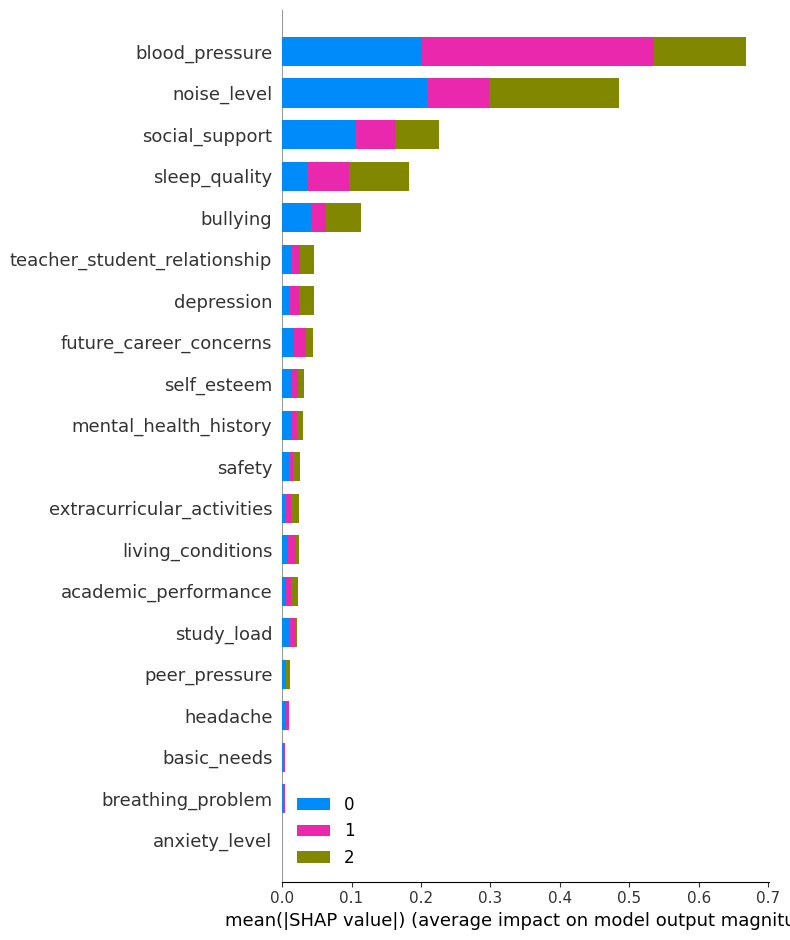

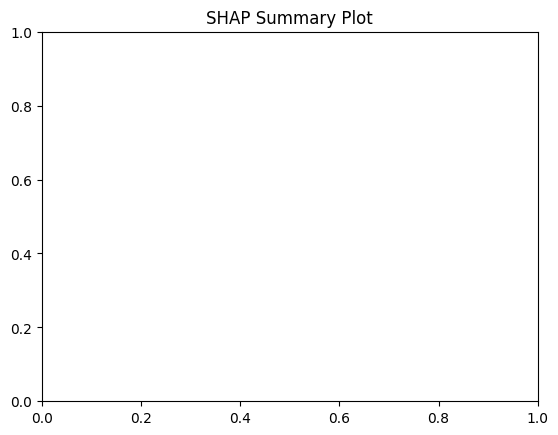

Classification Report and Feature Importance saved to Excel files.


In [ ]:
!pip install shap
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import shap

# Load the dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/StressLevelDataset.csv'
df = pd.read_csv(file_path)

# Separate features (X) and target variable (y)
X = df.drop('stress_level', axis=1)
y = df['stress_level']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test_scaled)

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Oranges", xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Save the confusion matrix to Excel
confusion_matrix_df = pd.DataFrame(conf_matrix, index=['0', '1', '2'], columns=['0', '1', '2'])
confusion_matrix_df.to_excel('/content/drive/MyDrive/Colab Notebooks/confusion_matrix_dt.xlsx')

# Save the classification report to an Excel file
classification_report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
classification_report_df.to_excel('/content/drive/MyDrive/Colab Notebooks/classification_report_dt.xlsx')

# Feature Importance Analysis
feature_importance = dt_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance Analysis')
plt.show()

# SHAP Analysis
explainer = shap.TreeExplainer(dt_model)
shap_values = explainer.shap_values(X_test_scaled)

# Summary plot of SHAP values
shap.summary_plot(shap_values, X_test, feature_names=X.columns, class_names=['0', '1', '2'])
plt.title('SHAP Summary Plot')
plt.show()

# Display the results
print("Classification Report and Feature Importance saved to Excel files.")

